Urban Sound Classification Report
=================================

Goal: Create a model to classify audio files from 10 classes of the UrbanSound8K dataset (https://urbansounddataset.weebly.com)

Approach
--------

We explore 3 different approaches.
1. Plotting the Mel-frequency cepstral coefficients (MFCCs) and feeding the resulting image to a CNN (https://arxiv.org/abs/1609.09430).
2. Using the raw audio data in waveform and giving it to a CNN.
3. Generating a waveform representation of the audio and feeding it first to a CNN and then the result to a LSTM network (https://arxiv.org/abs/1904.04364).

The data preparation is documented in *data_preparation*.  
The first approach in *cnn_spectogram.ipynb*.  
The second approach in *RawIntegers.ipynb*.  
The third approach in *bit_waveform.ipynb*. 

We used accuracy as a metric to evaluate our solution.

Results
-------

| Setting | Validation accuracy[%] | Test accuracy[%] |
|---------|------------------------|------------------|
| CNN     | 88.1                   | 84.1             |
| Raw     |                        |                  |
| Bitwave | 54.8                   | 53.0             |

Learning Curves
---------------

### CNN with MFCC Accuracy and Loss
![CNN Accuracy](plots/resnet_accuracy.png)
![CNN Loss](plots/resnet_loss.png)

## CNN+LSTM with Bit Wave Representation Accuracy and Loss
![CNN Accuracy](plots/rnn_accuracy.png)
![CNN Loss](plots/rnn_loss.png)

Example of use
---------------

In [6]:
import torch
import numpy as np
import torch.nn as nn
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt

example_dir = 'examples/'
label2idx ={'air_conditioner': 0,
 'car_horn': 1,
 'children_playing': 2,
 'dog_bark': 3,
 'drilling': 4,
 'engine_idling': 5,
 'gun_shot': 6,
 'jackhammer': 7,
 'siren': 8,
 'street_music': 9}

idx2label = {v: k for k, v in label2idx.items()}

model_densenet = models.densenet121(pretrained=True)
densenet_num_ftrs = model_densenet.classifier.in_features
model_densenet.classifier = nn.Linear(densenet_num_ftrs, 10)

model_densenet_filepath = 'saved_models/densenet_adabound_best_val=88_1.pth'
model_densenet.load_state_dict(torch.load(model_densenet_filepath))

model_densenet.eval();


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


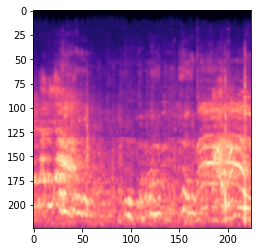

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prediction:  children_playing
True Label: children_playing


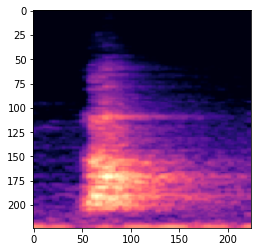

Prediction:  dog_bark
True Label: dog_bark


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


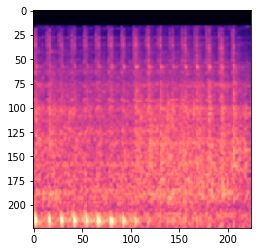

Prediction:  jackhammer
True Label: jackhammer


In [99]:
data_transforms = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

dataset = datasets.ImageFolder('examples/', data_transforms)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=1)
dataloader_iter = iter(dataloader)

with torch.no_grad():
    for img, label in dataloader:
        densenet_out = model_densenet(img)
        _, densenet_pred = torch.max(densenet_out.data, 1)
        image = 0.5 + (img[0].transpose(0,1).transpose(1,2).numpy())/4.0
        plt.imshow(image);
        plt.show()
        print("Prediction: ", idx2label[int(densenet_pred[0])])
        print("True Label:", idx2label[int(label)])

